In [46]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 🔎 Carga y análisis de datos

In [47]:

df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [48]:
# Verificar estadisticas de los datos, incluir categoricos
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,NaN,NaN,NaN,303.0,175.370085,0.0,151.5,303.0,454.5,606.0
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.0,NaN,NaN,NaN,324000.062603,1544357.486636,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.0,NaN,NaN,NaN,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0


**Conclusión:** el año en el que se reportaron los datos varía entre 2020 y 2022. Para estos roles estos años no fueron tan significativos para cambiar el salario como si lo fueron 2022-2024 en donde la IA ha estado más en auge desde que salieron los LLM, por lo que no se tendrá en cuenta esta característica

In [49]:
# Verificar si hay datos faltantes
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [50]:
# Verificar los valores de las características categóricas
print('experience_level: ', df["experience_level"].unique())
print('employment_type: ', df["employment_type"].unique())
print('job_title: ', df["job_title"].unique())
print('salary_currency: ', df["salary_currency"].unique())
print('employee_residence:', df["employee_residence"].unique())
print('company_location:', df["company_location"].unique())
print('company_size:', df["company_size"].unique())

experience_level:  ['MI' 'SE' 'EN' 'EX']
employment_type:  ['FT' 'CT' 'PT' 'FL']
job_title:  ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Ana

In [51]:
# Verificar si hay datos duplicados
df.duplicated().sum()

np.int64(0)

# 💬 Tratamiento de variables categóricas

## ⬆️ Variables categóricas con un orden

In [ ]:
# Aplicaremos OrdinalEncoder para las variables categóricas que tienen un orden:
# experience_level, company_size y employment_type

experience_level_mapping = {
    'EN': 0,
    'MI': 1,
    'S⬆E': 2,
    'EX': 3
}
df["experience_level"] = df["experience_level"].map(experience_level_mapping)

company_size_mapping = {
    'S': 0,
    'M': 1,
    'L': 2
}
df["company_size"] = df["company_size"].map(company_size_mapping)

employment_type_mapping = {
    'FT': 0,
    'CT': 1,
    'FL': 2,
    'PT': 3
}

# Verificar los cambios
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,1,0,Data Scientist,70000,EUR,79833,DE,0,DE,2
1,1,2020,2,0,Machine Learning Scientist,260000,USD,260000,JP,0,JP,0
2,2,2020,2,0,Big Data Engineer,85000,GBP,109024,GB,50,GB,1
3,3,2020,1,0,Product Data Analyst,20000,USD,20000,HN,0,HN,0
4,4,2020,2,0,Machine Learning Engineer,150000,USD,150000,US,50,US,2


## 📜 Job Title

In [53]:
# Chequear como es la distribucion de job_title
job_title_counts = df["job_title"].value_counts()
job_title_counts

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [54]:
# Al tener una distribucion muy desigual, podríamos: 

# 1. Agrupar categorías poco frecuentes 
# Definir un umbral para agrupar categorías poco frecuentes
threshold = 6
# Crear una nueva columna para el job_title agrupado
df["job_title_grouped"] = df["job_title"].apply(lambda x: x if job_title_counts[x] >= threshold else "Other")
# Verificar los cambios
df["job_title_grouped"].value_counts()

job_title_grouped
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Other                          80
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Data Science Consultant         7
Director of Data Science        7
AI Scientist                    7
Principal Data Scientist        7
Data Analytics Manager          7
Lead Data Engineer              6
ML Engineer                     6
Computer Vision Engineer        6
BI Data Analyst                 6
Name: count, dtype: int64

In [55]:
# 2. Aplicar Frequency Encoding

df["job_title_grouped"] = df["job_title_grouped"].map(df["job_title_grouped"].value_counts())
# Verificar los cambios
df["job_title_grouped"].value_counts()

job_title_grouped
143    143
132    132
97      97
80      80
41      41
7       35
6       24
8       16
16      16
12      12
11      11
Name: count, dtype: int64

## 🏠 Employee Residence

In [56]:
# Chequear como es la distribucion de employee_residence
employee_residence_counts = df["employee_residence"].value_counts()
employee_residence_counts

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: count, dtype: int64

In [ ]:
# aplicaer lo mismos pasos que se hicieron con job_title

threshold = 6
df["employee_residence_grouped"] = df["employee_residence"].apply(lambda x: x if employee_residence_counts[x] >= threshold else "Other")
df["employee_residence_grouped"].value_counts()

employee_residence_grouped
US       332
Other     76
GB        44
IN        30
CA        29
DE        25
FR        18
ES        15
GR        13
JP         7
PK         6
PT         6
BR         6
Name: count, dtype: int64

In [58]:
df["employee_residence_grouped"] = df["employee_residence_grouped"].map(df["employee_residence_grouped"].value_counts())

## 🏢 Company Location

In [59]:
# por ultimo, hacer lo mismo con company_location
company_location_counts = df["company_location"].value_counts()
company_location_counts

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [60]:
threshold = 4
df["company_location_grouped"] = df["company_location"].apply(lambda x: x if company_location_counts[x] >= threshold else "Other")
df["company_location_grouped"].value_counts()

company_location_grouped
US       355
Other     61
GB        47
CA        30
DE        28
IN        24
FR        15
ES        14
GR        11
JP         6
NL         4
AT         4
PT         4
PL         4
Name: count, dtype: int64

In [61]:
df["company_location_grouped"] = df["company_location_grouped"].map(df["company_location_grouped"].value_counts())

## 📊 Distribución del trabajo remoto

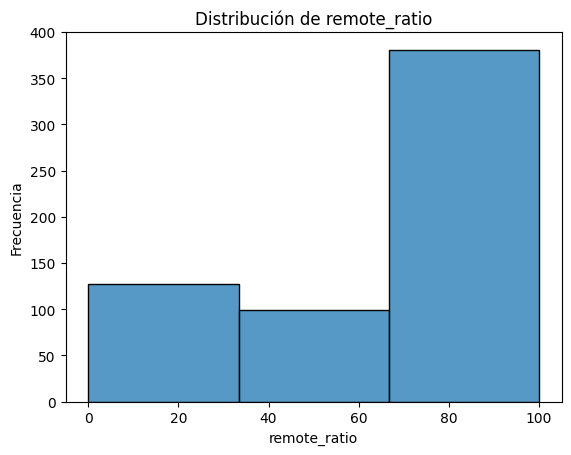

In [67]:
# Conteo de frecuencias de remote_ratio
sns.histplot(df["remote_ratio"], bins=3) 
plt.xlabel("remote_ratio")
plt.ylabel("Frecuencia")
plt.title("Distribución de remote_ratio")
plt.show()

Se observa que hay muchos trabajadores remotos, algo común en esta área.

## 📍 Salario basado en residencia y ubicación de empresa

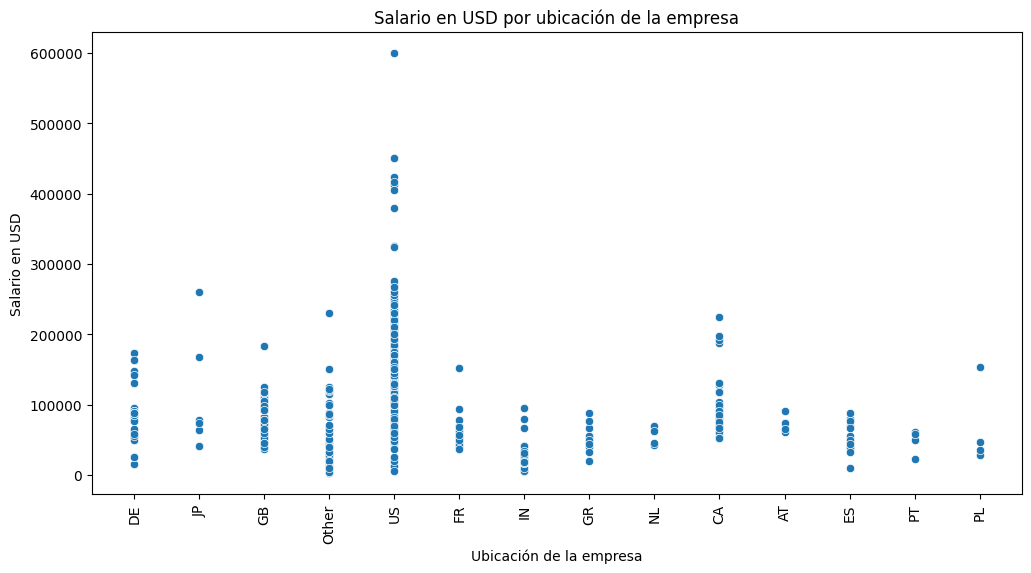

In [ ]:
# 1. Graficar company_location vs salary_in_usd
threshold = 4
df["company_location_grouped_for_graph"] = df["company_location"].apply(lambda x: x if company_location_counts[x] >= threshold else "Other")
df["company_location_grouped_for_graph"].value_counts()

# plottear un scatter entre company_location_grouped_for_graph y salary_in_usd
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="company_location_grouped_for_graph", y="salary_in_usd")
plt.xticks(rotation=90)
plt.xlabel("Ubicación de la empresa")
plt.ylabel("Salario en USD")
plt.title("Salario en USD por ubicación de la empresa")
plt.show()

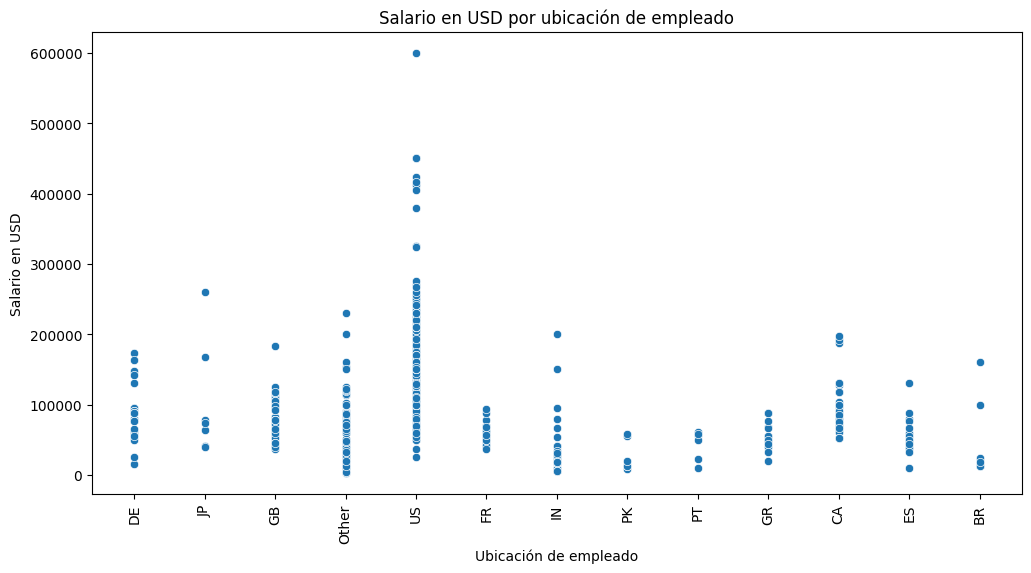

In [79]:
# 1. Graficar employee_residence vs salary_in_usd
threshold = 6
df["employee_residence_grouped_for_graph"] = df["employee_residence"].apply(lambda x: x if employee_residence_counts[x] >= threshold else "Other")
df["employee_residence_grouped_for_graph"].value_counts()

# plottear un scatter entre employee_residence_grouped_for_graph y salary_in_usd
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="employee_residence_grouped_for_graph", y="salary_in_usd")
plt.xticks(rotation=90)
plt.xlabel("Ubicación de empleado")
plt.ylabel("Salario en USD")
plt.title("Salario en USD por ubicación de empleado")
plt.show()

**Conclusion:**  los outliers son dicientes, nos dicen por ejemplo que las personas que más ganan, son por ejemplo una persona que gana mucho en estados unidos vive en estados unidos. Esto explica casos de empresas TOP de tecnología como Amazon, Apple, Nvidia, Google que tienen sede en USA y en el 2022 le pidieron a sus trabajadores trabajo presencial.

# 🤖 X y y

In [88]:
# extraer un df X y un vector y eliminar las columnas que no se van a usar
X = df.drop(columns=["work_year", "Unnamed: 0", "salary", "salary_in_usd", "job_title", "employee_residence", "company_location", "company_size", "salary_currency", "company_location_grouped_for_graph", "employee_residence_grouped_for_graph", "employee_residence_grouped_for_graph"])
y = df["salary_in_usd"]

In [89]:
X

,experience_level,employment_type,remote_ratio,job_title_grouped,employee_residence_grouped,company_location_grouped
0,1,0,0,143,25,28
1,2,0,0,8,7,6
2,2,0,50,8,44,47
3,1,0,0,80,76,61
4,2,0,50,41,332,355
...,...,...,...,...,...,...
602,2,0,100,132,332,355
603,2,0,100,132,332,355
604,2,0,0,97,332,355
605,2,0,100,97,332,355


In [90]:
y

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 607, dtype: int64